In [71]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.weightstats import ztest

In [ ]:
statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)

In [82]:
data =  np.array([1]*39 + (116-39)*[0])

ztest(data, value= 1/3, alternative = 'larger', usevar='pooled', ddof=0)

(0.06551339017334061, 0.4738826227115864)

In [85]:
k = 40
phat = k/116
n = 116
p = 1/3
SE = np.sqrt(p*(1-p)/n)
z = (phat-p)/SE
z

0.26261286571944603

In [86]:
k = 39
phat = k/116
n = 116
p = 1/3n
SE = np.sqrt(p*(1-p)/n)
z = (phat-p)/SE
z

0.06565321642986183

In [17]:
39/116, 40/116

(0.33620689655172414, 0.3448275862068966)

In [40]:
p = 40/116
n = 116

p = 1/3
SE = np.sqrt(p*(1-p)/n)

SE

0.04376881095324085

In [41]:
.34*.66

0.22440000000000002

In [42]:
np.sqrt(.222/116)

0.0437469210739256

In [67]:
z_twoside, pval_twoside = proportions_ztest(count=18,
                                            nobs=30,
                                            value=.5,
                                            prop_var=0.5,
                                            alternative='larger')

# Two sided by hand
p_hat = 0.6
p = .5
n = 30
sd = (p*(1-p) / (n))**0.5 # st dev from sampling distribution
z2 = (p_hat - p)/sd # test stat
pval2 = 2*(1 - stats.norm.cdf(z2)) # P-value

z2, z_twoside

(1.0954451150103321, 1.0954451150103321)

In [70]:
p0 = 1/3
z_twoside, pval_twoside = proportions_ztest(count=40,
                                            nobs=116,
                                            value= p0,
                                            prop_var= p0,
                                            alternative='larger')

# Two sided by hand
p_hat = 0.34
p = p0
n = 116
sd = (p*(1-p) / (n))**0.5 # st dev from sampling distribution
z2 = (p_hat - p)/sd # test stat
pval2 = 2*(1 - stats.norm.cdf(z2)) # P-value

z2, z_twoside

(0.15231546211727914, 0.26261286571944603)

In [92]:
(.34 - (1/3)) / np.sqrt( (2/9) / 116)

0.15231546211727914

In [95]:
k=39
((k/116) - (1/3)) / np.sqrt( (2/9) / 116)


0.06565321642986183

In [65]:
# One-sided
z_oneside, pval_oneside = proportions_ztest(count = 40, 
                                            nobs = 116, 
                                            value = 1/3, 
                                            prop_var = 1/3, 
                                            alternative = 'larger')


In [104]:
1 - stats.norm.cdf(.152)

0.43959346782576125

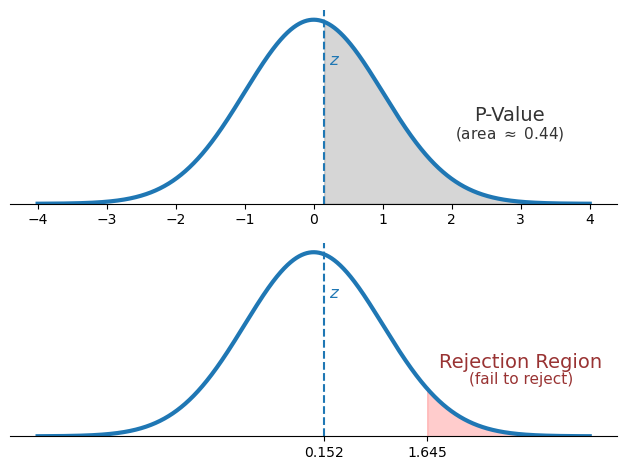

In [106]:
fig, axs = plt.subplots(2,1, sharey=True)



x = np.linspace(-4,4, 100_000)
norm_pdf = stats.norm.pdf(x)

# Plot the test statistic
z_oneside = .152


for ax in axs:
    # add normal curve
    ax.plot(x, norm_pdf, lw = 3)

    # add z stat
    ax.axvline(z_oneside, linestyle = 'dashed')
    ax.text(z_oneside, 0.3, ' $z$', ha = 'left', size = 12, color = 'C0')

    # Clean plot
    for s in 'left', 'right', 'top':
        ax.spines[s].set_visible(False)
        ax.yaxis.set_ticks([])
        ax.set_ylim(0,.42)


# draw rejection region
ax = axs[1]
alpha = .05
critical_value = stats.norm.ppf(1 - alpha) # for one-sided
rejection_x = x[x>critical_value]
ax.fill_between(rejection_x, norm_pdf[-len(rejection_x):], color = 'red', alpha = 0.2)
ax.text(3, .14, 'Rejection Region', fontsize = 14, color = (.6, .2, .2),
           va = 'bottom',
           ha = 'center') 
ax.text(3, .14, '(fail to reject)', fontsize = 11, color = (.6, .2, .2),
            va = 'top',
            ha = 'center') 
ax.set_xticks([z_oneside, critical_value])

# shade p-value
ax = axs[0]


more_extreme_x = x[x>z_oneside]
ax.fill_between(more_extreme_x, norm_pdf[-len(more_extreme_x):], color = (.2, .2, .2), alpha = 0.2)
ax.text(2.84, .17, 'P-Value', fontsize = 14, color = (.2, .2, .2),
           va = 'bottom',
       ha = 'center') 
ax.text(2.84, .17, r'(area $\approx$ 0.44)', fontsize = 11, color = (.2, .2, .2),
           va = 'top',
       ha = 'center') 

plt.tight_layout()
plt.savefig("../book/images/onesidedHT.svg", transparent=True)

### critical_value

NameError: name 'z_oneside' is not defined

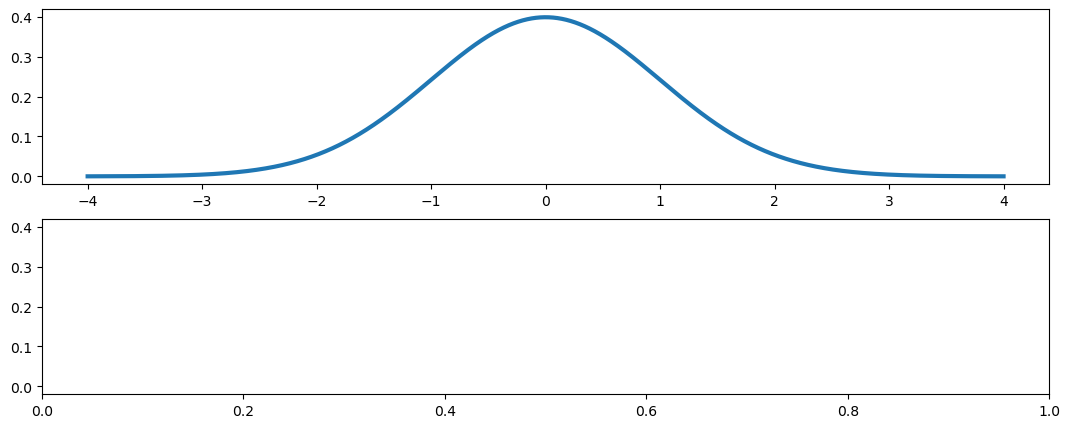

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4,4, 100_000)
norm_pdf = stats.norm.pdf(x)

# Make empty figure
fig, axs = plt.subplots(2, 1, figsize = (13,5),
                        sharey = True)

for ax in axs:
    # add normal curve
    ax.plot(x, norm_pdf, lw = 3)

    # add z stat
    ax.axvline(z_oneside, linestyle = 'dashed')
    ax.text(z_oneside, 0.3, ' $z$', ha = 'left', size = 12, color = 'C0')

    # Clean plot
    for s in 'left', 'right', 'top':
        ax.spines[s].set_visible(False)
        ax.yaxis.set_ticks([])
        ax.set_ylim(0,.42)


# draw rejection region
ax = axs[0]
alpha = .05
critical_value = stats.norm.ppf(1 - alpha) # for one-sided
rejection_x = x[x>critical_value]
ax.fill_between(rejection_x, norm_pdf[-len(rejection_x):], color = 'red', alpha = 0.2)
ax.text(1.8, .14, 'Rejection Region', fontsize = 19, color = (.6, .2, .2)) 

# shade p-value
ax = axs[1]
more_extreme_x = x[x>z_oneside]
ax.fill_between(more_extreme_x, norm_pdf[-len(more_extreme_x):], color = (.2, .2, .2), alpha = 0.2)
ax.text(2, .17, 'P-Value', fontsize = 19, color = (.2, .2, .2)) 

#ax.set_title("One-sided Test", fontsize = 15)
fig.tight_layout()
#fig.savefig("onesidedtest.pdf")
fig.show()